In [4]:
# import required dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [5]:
# import dataset
performance = pd.read_csv(r'C:\Users\Nitesh Bhattarai\Desktop\StudentPerformance\student_study_root\study_labour\notebook\student_scores - student_scores.csv')

# viewing data

In [6]:
performance.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
performance.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [9]:
performance.shape

(25, 2)

In [10]:
performance.size

50

In [11]:
performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [12]:
performance.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [16]:
type(performance)

pandas.core.frame.DataFrame

In [17]:
performance.columns

Index(['Hours', 'Scores'], dtype='object')

In [21]:
performance.columns = performance.columns.str.lower()

# Visualizing data

<AxesSubplot:xlabel='hours', ylabel='scores'>

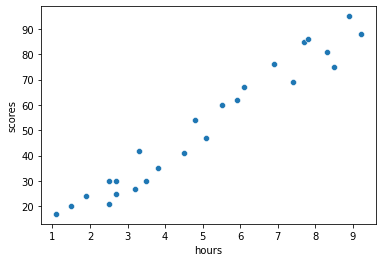

In [23]:
sns.scatterplot(data=performance, x=performance.iloc[:,0], y=performance.iloc[:,-1])

<AxesSubplot:xlabel='hours', ylabel='scores'>

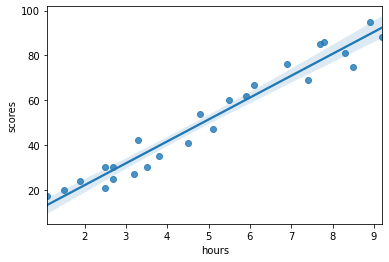

In [24]:
sns.regplot(data=performance, x=performance.iloc[:,0], y=performance.iloc[:,-1])

In [25]:
# splits the data
x = performance.iloc[:,0] 
y = performance.iloc[:,-1]

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=40)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(20,) (5,) (20,) (5,)


In [46]:
x_train, x_test, y_train, y_test = pd.DataFrame(data=x_train), pd.DataFrame(data=x_test), pd.DataFrame(data=y_train), pd.DataFrame(data=y_test)

In [47]:
Performance_score_model = LinearRegression()

In [48]:
Performance_score_model.fit(x_train, y_train)

LinearRegression()

In [51]:
y_predict_score_train = Performance_score_model.predict(x_train)

In [52]:
r2_score(y_train, y_predict_score_train)

0.9504931730009657

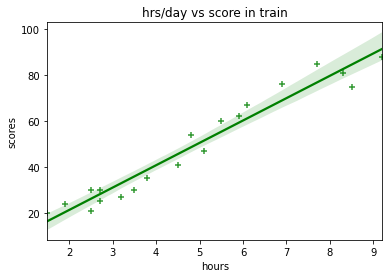

In [64]:
sns.regplot(x=x_train, y=y_train, color='g', marker='+')
plt.title('hrs/day vs score in train')
plt.show()

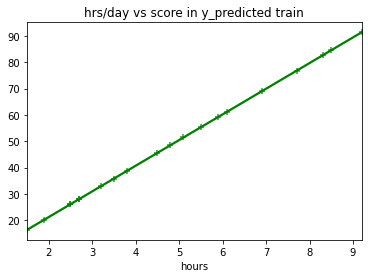

In [61]:
sns.regplot(x=x_train, y=y_predict_score_train, color='g', marker='+')
plt.title('hrs/day vs score in y_predicted train')
plt.show()

In [62]:
y_predict_score_test = Performance_score_model.predict(x_test)

# Metrics 

In [63]:
r2_score(y_test, y_predict_score_test)

0.9466449081971943

In [72]:
mean_absolute_error(y_test, y_predict_score_test)

6.457450193167183

In [73]:
mean_squared_error(y_test, y_predict_score_test)

44.1652107906905

In [75]:
mean_squared_error(y_test, y_predict_score_test, squared=False)

6.645691144695975

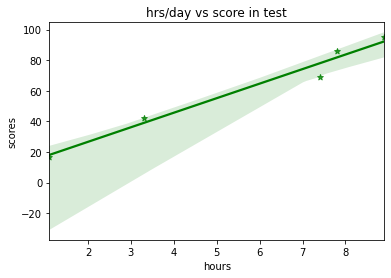

In [67]:
sns.regplot(x=x_test, y=y_test, color='g', marker='*')
plt.title('hrs/day vs score in test')
plt.show()

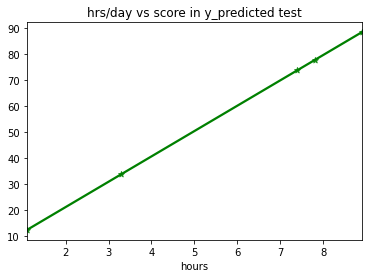

In [70]:
sns.regplot(x=x_test, y=y_predict_score_test, color='g', marker='*')
plt.title('hrs/day vs score in y_predicted test')
plt.show()

# Equation of Linear Regression 
# y = mx + c

In [78]:
c = Performance_score_model.intercept_
print('Intercept of simple linear regression : ', c)

Intercept of simple linear regression :  [1.7557382]


In [79]:
m = Performance_score_model.coef_
print('Coefficient of simple linear regression : ', m)

Coefficient of simple linear regression :  [[9.74054996]]


# y is dependent variable i.e. predicted score,
# x is independent variable i.e. study hrs/day,
# y = 9.74054996*x + 1.7557382

In [84]:
# What will be predicted score if a student studies for 9.25 hrs/day ?
Performance_score_model.predict([[9.25]])

array([[91.85582532]])

In [95]:
y = 9.74054996*9.25 + 1.7557382
print('student studying {} hrs/day will score {}%:'.format(9.25, round(y)))

student studying 9.25 hrs/day will score 92%:
